6365


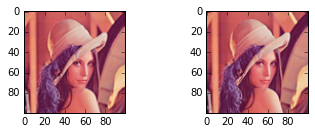

In [8]:
#!/usr/bin/env python
# coding: utf-8

# In[74]:


from __future__ import division
from math import gcd

from random import randrange, getrandbits, randint
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np


def quot(z, p):
    
        return (z + p // 2) // p
        
def mod(z, p):
        return z - quot(z,p) * p
	

#normal symmetric scheme

import random

LAMBDA = 4 #security parameter
N = LAMBDA
P = LAMBDA ** 2
Q = LAMBDA ** 5

def keygen():
	key = random.getrandbits(P)
	while(key % 2 == 0):
		key = random.getrandbits(P)
	return key

def encrypt(key, aBit):
	q = random.getrandbits(Q)
	m_a = 2 * random.getrandbits(N - 1)
	c = key * q + m_a + aBit
	return c

def decrypt(key, cipherText):
	return mod(cipherText, key) % 2

def add(cipherText1, cipherText2):
	return cipherText1 + cipherText2

def mult(cipherText1, cipherText2):
	return cipherText1 * cipherText2

def encryptNum(key, num):
    bits =  [int(digit) for digit in bin(num)[2:]] 
    outNums = [encrypt(key, i) for i in bits]
    return outNums



def decNum(key, ls):
    bits =  []
    for num in ls:
    	bits.append(decrypt(key, num))
    res = int("".join(str(x) for x in bits), 2) 
    return res

def encryptImage(key, originalPlainImage):       
    encryptedimg = np.asarray(originalPlainImage)
    shape = encryptedimg.shape
    encryptedimg = encryptedimg.flatten().tolist()
    n = len(encryptedimg)
    for i in range(n):
        pix = encryptedimg[i];
        encryptedPixelValue = encryptNum( key, pix)
        encryptedimg[i] = encryptedPixelValue

    return np.asarray(encryptedimg).reshape(shape)
    
def decryptImage(key, encryptedimg):
    shape = encryptedimg.shape
    originalPlainImage = encryptedimg.flatten().tolist()

    n = len(originalPlainImage)	
    for i in range(n):
        pix= originalPlainImage[i]
        decryptpix = decNum(key,pix)
        
        originalPlainImage[i]=decryptpix
        
    return (np.asarray(originalPlainImage).reshape(shape).astype(np.uint8))



def go():
	key = keygen()
	print( key )
	basewidth = 100
	img = Image.open(r"C:\Users\Jayant\Desktop\lena.png")

	wpercent = (basewidth/float(img.size[0]))
	hsize = int((float(img.size[1])*float(wpercent)))
	img = img.resize((basewidth,hsize), Image.ANTIALIAS)

	im = (np.asarray(img))

	a = encryptImage(key, im)
# 	print(a)

	b = decryptImage(key, a)

	im = Image.fromarray(im)
	#a = Image.fromarray(a)
	b = Image.fromarray(b)

	plt.subplot(2, 2, 1)
	plt.imshow(im)
	plt.subplot(2, 2, 2)
	plt.imshow(b)
	plt.show()




go()



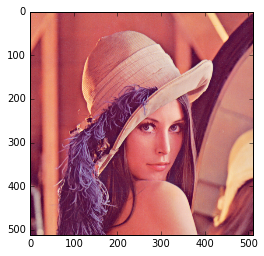

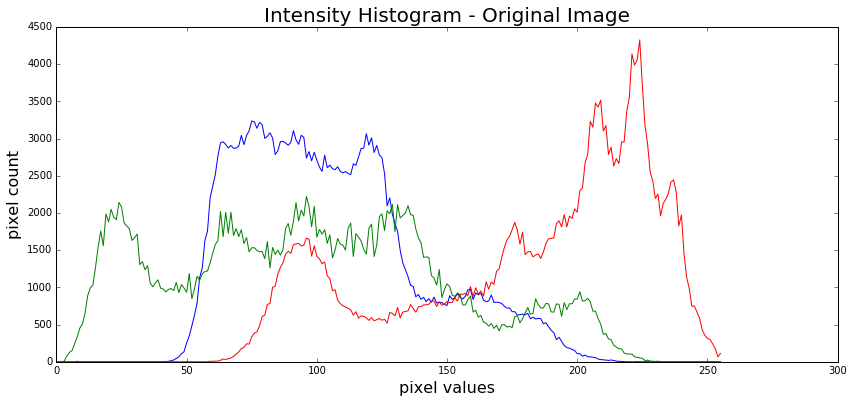

In [158]:
from matplotlib.pyplot import imshow
import cv2 

image = r"C:\Users\Jayant\Desktop\lena"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

In [160]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

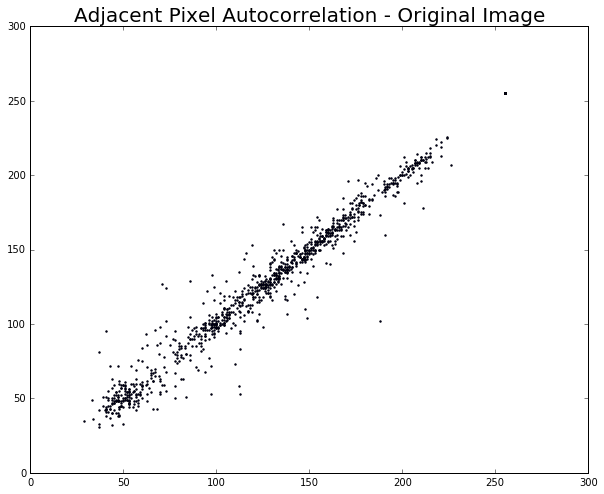

In [161]:

ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

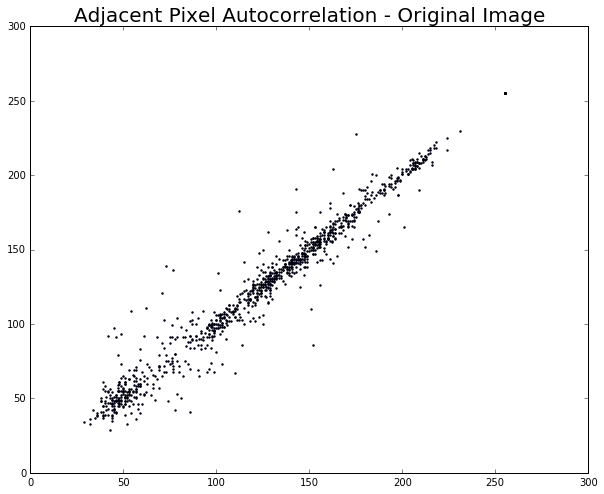

In [163]:

ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

In [6]:

# !apt-get install libgmp-dev libmpfr-dev libmpc-dev
# !pip install gmpy2

from math import gcd
import gmpy2 as gm2
from random import randrange, getrandbits, randint
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

BITS = 128
def lcm(a, b):
	return abs(a * b) // gcd(a,b)

def extendedEuclidAlgo(a, b):  
	if a == 0 :   
		return b,0,1
	gcd,x1,y1 =extendedEuclidAlgo(b%a, a)  
	x = y1 - (b//a) * x1  
	y = x1  	 
	return gcd,x,y 
	
def findMultiplicativeInverse(a, m):
	gcd,x,y = extendedEuclidAlgo(a,m)	
	if(gcd!=1):
		return -10000000
	else:
		return (x % m)
	
def isPrime(n):
	a = gm2.is_prime(n)
	return a

def findPossiblePrimeNumber(length):
	p = getrandbits(length)
	p |= (1 << length - 1) | 1
	return p

def findPrimeNumber(k=BITS):
	p = 8
	while not isPrime(p):
		p = findPossiblePrimeNumber(k)
	return p

def genKeysPublicAndPrivate(bitlen=BITS):
	p = findPrimeNumber(bitlen)
	q = findPrimeNumber(bitlen)
	lambdA = lcm( p-1, q-1)
	n = p * q
	mU = findMultiplicativeInverse( lambdA, n)
	g=n+1
	PrivateKey = [ lambdA, mU]
	Publickey =[ n,g]	
	return [Publickey, PrivateKey]
##############################################################################################
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m
##############################################################################################

def encryptSingleValue(public_key, originalVal, r = -1):
	if r == -1:
		r = randint( 1, public_key[0]-1)
		while not gcd( r, public_key[0]) == 1:
			r = randint( 1, public_key[0])
	pk2 = public_key[0]**2
	# print(public_key[1], originalVal, pk2)
	# if originalVal >= 0:
	if True:
		a = pow(public_key[1], int(originalVal), pk2)
		b = pow(r, public_key[0], pk2)
	# else:
	# 	a = pow(public_key[1], -int(originalVal), pk2)
	# 	b = pow(r, public_key[0], pk2)
	
	encryptedtext = (a * b) % pk2
	# print(public_key[1], originalVal, pk2, encryptedtext)
	return encryptedtext

def decryptSingleValue(public_key, private_key, encryptedtext):
	pk2 = public_key[0]**2
	x = pow(encryptedtext, private_key[0], pk2)
	L = lambda x: (x - 1) // public_key[0]	
	decryptedVal = (L(x) * private_key[1]) % public_key[0] 
	return decryptedVal

def addConstant2EncryptedValue(public_key, a, k):
	pk2 = public_key[0]**2
	# return a * pow( public_key[1], k, pk2) % pk2
	return (a * encryptSingleValue(public_key, k)   )  % pk2
def addEncrypted2EncryptedValue(public_key, a, k):
	pk2 = public_key[0]**2
	# return a * pow( public_key[1], k, pk2) % pk2
	return (( a *  k )%pk2)

def mulConstant2EncryptedValue(public_key, a, k):
	pk2 = public_key[0]**2
	return pow(a, k, pk2)

def encryptImage(public_key, originalPlainImage):
	r = randint( 1, public_key[0]-1)
	while not gcd( r, public_key[0]) == 1:
		r = randint( 1, public_key[0])
	encryptedimg = np.asarray(originalPlainImage)
	shape = encryptedimg.shape
	encryptedimg = encryptedimg.flatten().tolist()
	n = len(encryptedimg)	
	for i in range(n):	
		pix = encryptedimg[i];
		encryptedPixelValue = encryptSingleValue( public_key, pix, r)
		encryptedimg[i] = encryptedPixelValue		
	return np.asarray(encryptedimg).reshape(shape)

def addConstKToImage(public_key, originalPlainImage, k=40):
	encryptedimg = np.asarray(originalPlainImage)
	shape = encryptedimg.shape
	encryptedimg = encryptedimg.flatten().tolist()
	n = len(encryptedimg)	
	for i in range(n):		
		pix = encryptedimg[i];
		encryptedPixelValue = addConstant2EncryptedValue(public_key, pix, k)
		encryptedimg[i] = encryptedPixelValue		
	return np.asarray(encryptedimg).reshape(shape)

def mulConstKToImage(public_key, originalPlainImage, k=2):
	encryptedimg = np.asarray(originalPlainImage)
	shape = encryptedimg.shape
	encryptedimg = encryptedimg.flatten().tolist()
	n = len(encryptedimg)	
	for i in range(n):		
		pix = encryptedimg[i];
		encryptedPixelValue = mulConstant2EncryptedValue(public_key, pix, k)
		encryptedimg[i]=encryptedPixelValue		
	return np.asarray(encryptedimg).reshape(shape)

def decryptImage(public_key, private_key, encryptedimg):
	shape = encryptedimg.shape
	originalPlainImage = encryptedimg.flatten().tolist()
	n = len(originalPlainImage)	
	for i in range(n):		
		pix= originalPlainImage[i]
		decryptpix = decryptSingleValue(public_key,private_key,pix)
		if decryptpix>255:
			decryptpix=255
		if decryptpix<0:
			decryptpix=0
		originalPlainImage[i]=decryptpix					
	return (np.asarray(originalPlainImage).reshape(shape).astype(np.uint8))




	############################################################################## FOR MULT


def rgb2gray(rgb):
	r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
	gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
	for g in range(len(gray)):
		for gg in range(len(gray[0])):
			gray[g][gg] = int(gray[g][gg])
	print(gray)
	return gray

# def addConstKToImage(public_key, originalPlainImage, k=40):
# 	encryptedimg = np.asarray(originalPlainImage)
# 	shape = encryptedimg.shape
# 	encryptedimg = encryptedimg.flatten().tolist()
# 	n = len(encryptedimg)	
# 	for i in range(n):		
# 		pix = encryptedimg[i];
# 		encryptedPixelValue = addConstant2EncryptedValue(public_key, pix, k)
# 		encryptedimg[i] = encryptedPixelValue		
# 	return np.asarray(encryptedimg).reshape(shape)
def conv(pKey, im, imn):
	im2 = np.asarray(im)
	shape = im2.shape
	for r in range(len(im)):
		for c in range( len(im[0])):
			if r>0 and c>0 and r<len(im)-1 and c<len(im[0])-1:

				# im2[r][c] =  (  5*im[r][c] - im[r-1][c] -im[r+1][c] -im[r][c-1]- im[r][c+1] ) 
				im2[r][c]  = mulConstant2EncryptedValue(pKey, im[r][c] , 5)
				# print("DONE")
				# print(im[r][c] , -im[r+1][c])
				im2[r][c]  = addEncrypted2EncryptedValue(pKey, im2[r][c] ,  imn[r-1][c])
				im2[r][c]  = addEncrypted2EncryptedValue(pKey, im2[r][c] , imn[r+1][c])
				im2[r][c]  = addEncrypted2EncryptedValue(pKey, im2[r][c] , imn[r][c-1])
				im2[r][c]  = addEncrypted2EncryptedValue(pKey, im2[r][c] , imn[r][c+1])

				# im2[r][c] = max(0, im2[r][c] )
				# im2[r][c] = min(255, im2[r][c] )
			else:
				im2[r][c] = im[r][c]
				# print("EX")

	return np.asarray(im2).reshape(shape)


def goSharpen():  # FUNCTION TO APPLY IMAGE SHARPENING
	print("Now applying image sharpening")

	keysObtained =genKeysPublicAndPrivate()
	basewidth = 50
	img = Image.open("lena.png")  

	wpercent = (basewidth/float(img.size[0]))
	hsize = int((float(img.size[1])*float(wpercent)))
	img = img.resize((basewidth,hsize), Image.ANTIALIAS)

	img = rgb2gray(  np.asarray(img) )
	imgNeg = np.multiply(img, -1)
	
	encrypted_img = encryptImage(keysObtained[0],img)
	print(encrypted_img[0][0])

	encrypted_img2 = encryptImage(keysObtained[0],imgNeg)
	print(encrypted_img2[0][0])

	

	encrypted_img = conv(keysObtained[0],encrypted_img, encrypted_img2)
	encImg = Image.fromarray(encrypted_img, 'L')

	####### Decrypt
	decrypted_img2 = decryptImage(keysObtained[0],keysObtained[1],encrypted_img)
	decImg = Image.fromarray(decrypted_img2, 'L')

	plt.subplot(1,3, 1)
	plt.axis('off')
	plt.imshow(img)
	plt.title("original image")
	
	# plt.show()
	plt.subplot(1,3, 2)
	plt.axis('off')
	plt.imshow(encImg)
	plt.title("encrypted image")
	# plt.show()
	
	#
	plt.subplot(1,3, 3)
	plt.axis('off')
	plt.imshow(decImg)
	plt.title("decrypted image")
	# plt.show()

	# plt.subplot(2,2, 4)
	# plt.axis('off')
	# plt.imshow(encrypted_img2)
	# plt.title("decrypted image")
	plt.show()






goSharpen()

Now applying image sharpening
[[159. 157. 153. ... 124. 127. 116.]
 [156. 156. 153. ... 135.  93.  44.]
 [157. 157. 159. ...  93.  40.  50.]
 ...
 [ 90. 152. 146. ... 105.  91.  64.]
 [ 56. 131. 164. ... 116.  70.  53.]
 [ 41. 125. 197. ...  86.  50.  75.]]
4475029186051593161341217417443606318568844047186212085305208644112538492382021872571962251100988851557759992680264643969096642554089207355225674669118314


ValueError: pow() 2nd argument cannot be negative when 3rd argument specified